In [2]:
include("backend.jl")

eulermethod

[4.6350864849219225e7, 124812.39792474099, 2.132591347099538e6, 2.6914209866000772e6, 59188.41915639839]


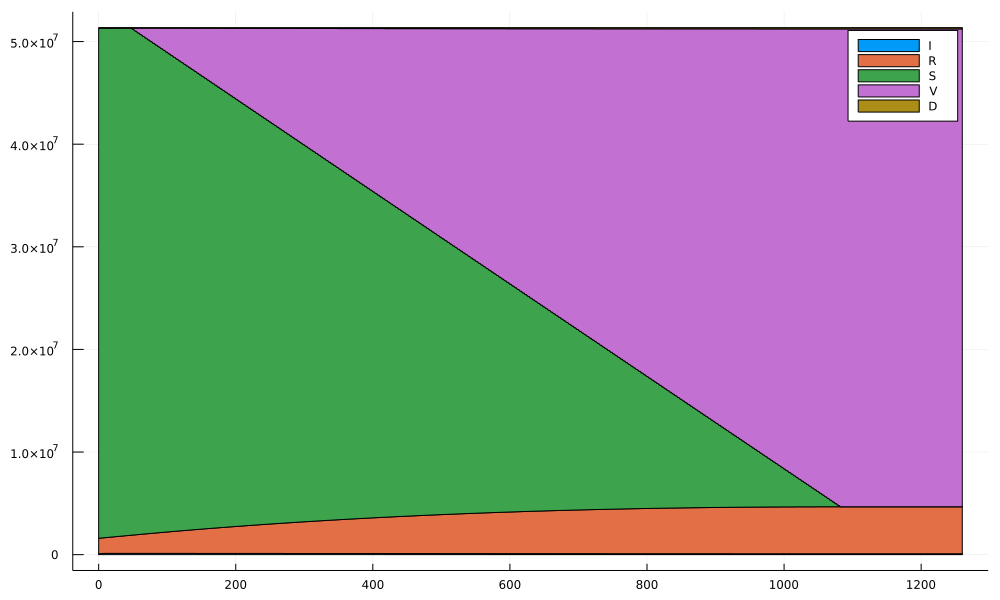

In [126]:
function vaccine_rate(x)
    if x < 48 return 0 end
    x -= 47
    return (sin(x/0.6)+1)*(100000/2)
end

function derivative(X::Vector{Vector{Float64}}, N::Float64, 
        β::Float64, γ::Float64, α::Float64, infection_time::Float64, 
        mortality_rate::Float64)

    infection_time = convert(Int32, infection_time)
    t, S, I, R, V, D = X[end]
    vaccinated_today = min(S, α * vaccine_rate(t))
    infected_today = min(S, β * (S * I / N))
    #println(t, " ", infected_today)

    uninfected_today = 0
    recovered_today = 0
    deceased_today = 0
    if length(X) > infection_time
        infected_before = min(X[end-infection_time][2], β * X[end-infection_time][2] * I / N)
        uninfected_today = min(I, infected_before)
        deceased_today = uninfected_today * mortality_rate
        recovered_today = uninfected_today * (1-mortality_rate) 
    end

    dtdt = 1
    dSdt = (-infected_today - vaccinated_today)
    dIdt = (infected_today - uninfected_today)
    dRdt = recovered_today
    dVdt = vaccinated_today
    dDdt = deceased_today
    return [dtdt, dSdt, dIdt, dRdt, dVdt, dDdt]
end


effective_contact_rate = 0.05197536964#0.007924651379962006
recovery_rate = 1.0/8.0
vaccine_efficacy = 0.9
total_pop = 51315383.0
recovered = 1520548.0
infected = 86437.0
deceased = 43495.0
vaccinated = 0.0
mortality_rate = 0.025
infection_time = 8
susceptible = total_pop - infected - recovered
stopping_condition = X -> X[end][1] >= 360*3.5

solution = eulermethod(convert(Vector{Float64},[0,susceptible, infected, 
    recovered, vaccinated, deceased]),
    derivative, 2.0^0, stopping_condition,
    args=[total_pop,effective_contact_rate,recovery_rate,
    vaccine_efficacy,infection_time,mortality_rate])

ts = [solution[i][1] for i ∈ 1:length(solution)]
SIRV = [solution[i][j] for i ∈ 1:length(solution), j ∈ 2:length(solution[1])]

println(SIRV[109,:])

stackedarea(ts, [SIRV[:,2] SIRV[:,3] SIRV[:,1] SIRV[:,4] SIRV[:,5]], labels=["I" "R" "S" "V" "D"],size=(1000,600))

In [45]:
using CSV
using DataFrames
datos_vacunas = CSV.read("Colombia.csv", DataFrame)

,location,date,vaccine,source_url
,String,Date…,String,String
1,Colombia,2021-02-17,"Pfizer/BioNTech, Sinovac",https://www.minsalud.gov.co/salud/publica/Vacunacion/Paginas/Vacunacion-covid-19.aspx
2,Colombia,2021-02-18,"Pfizer/BioNTech, Sinovac",https://www.minsalud.gov.co/salud/publica/Vacunacion/Paginas/Vacunacion-covid-19.aspx
3,Colombia,2021-02-19,"Pfizer/BioNTech, Sinovac",https://www.minsalud.gov.co/salud/publica/Vacunacion/Paginas/Vacunacion-covid-19.aspx
4,Colombia,2021-02-20,"Pfizer/BioNTech, Sinovac",https://www.minsalud.gov.co/salud/publica/Vacunacion/Paginas/Vacunacion-covid-19.aspx
5,Colombia,2021-02-21,"Pfizer/BioNTech, Sinovac",https://www.minsalud.gov.co/salud/publica/Vacunacion/Paginas/Vacunacion-covid-19.aspx
6,Colombia,2021-02-22,"Pfizer/BioNTech, Sinovac",https://www.minsalud.gov.co/salud/publica/Vacunacion/Paginas/Vacunacion-covid-19.aspx
7,Colombia,2021-02-23,"Pfizer/BioNTech, Sinovac",https://www.minsalud.gov.co/salud/publica/Vacunacion/Paginas/Vacunacion-covid-19.aspx
8,Colombia,2021-02-24,"Pfizer/BioNTech, Sinovac",https://www.minsalud.gov.co/salud/publica/Vacunacion/Paginas/Vacunacion-covid-19.aspx
9,Colombia,2021-02-25,"Pfizer/BioNTech, Sinovac",https://www.minsalud.gov.co/salud/publica/Vacunacion/Paginas/Vacunacion-covid-19.aspx


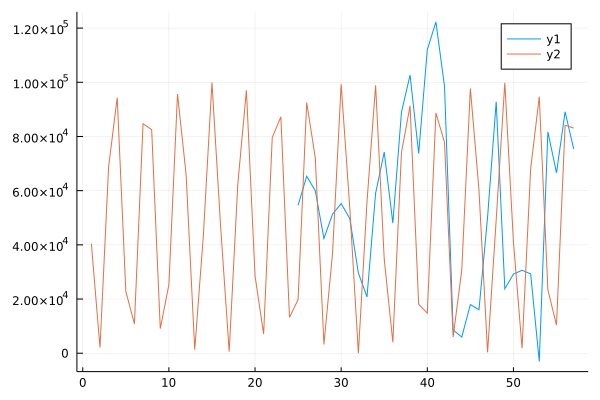

In [106]:
#plot([datos_vacunas[i,5] - datos_vacunas[i-1,5] for i ∈ 2:length(datos_vacunas[:,5])])
plot([datos_vacunas[i,6] - datos_vacunas[i-1,6] for i ∈ 2:length(datos_vacunas[:,6])])
#plot!([4000*x for x ∈ 2:length(datos_vacunas[:,5])])
#plot!([1000*x for x ∈ 2:length(datos_vacunas[:,5])])
#plot!([((sin(x/0.03)+1)/2)*(4000*x-1000*x) for x ∈ 2:length(datos_vacunas[:,5])])
plot!([(sin(x/0.6)+1)*(100000/2) for x ∈ 2:length(datos_vacunas[:,6])])

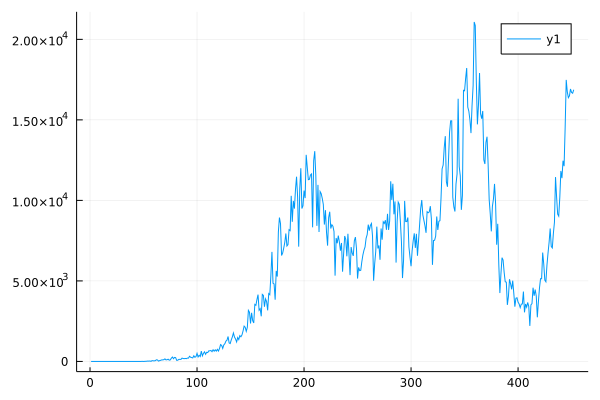

In [28]:
datos = CSV.read("casos.csv", DataFrame)

totales = convert(Array,datos[92,5:end])
nuevos = [totales[i] - totales[i-1] for i ∈ 2:length(recuperados_totales)]
casos_totales = totales
plot(nuevos)
# 

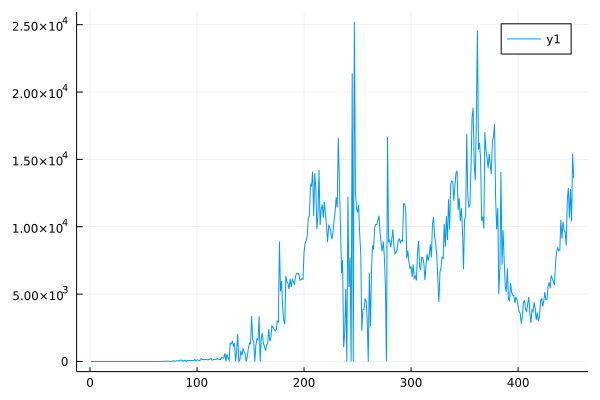

In [26]:
datos = CSV.read("recuperados.csv", DataFrame)

totales = convert(Array,datos[77,5:end])
nuevos = [totales[i] - totales[i-1] for i ∈ 2:length(recuperados_totales)]
recuperados_totales = totales
plot(nuevos)

#findfirst(x->x=="Colombia",datos_recuperados[:,2])

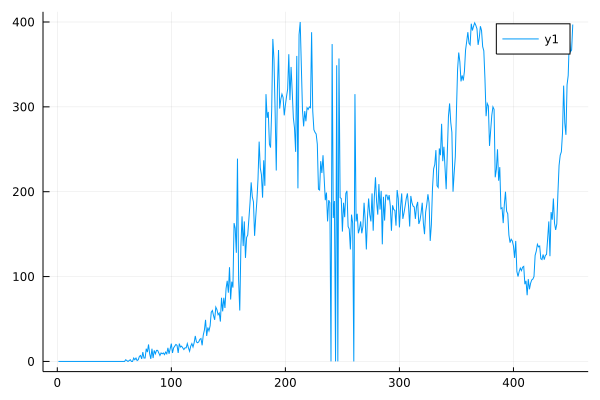

In [25]:
datos = CSV.read("muertes.csv", DataFrame)

totales = convert(Array,datos[92,5:end])
nuevos = [totales[i] - totales[i-1] for i ∈ 2:length(recuperados_totales)]
muertos_totales = totales
plot(nuevos)

0.007924651379962006


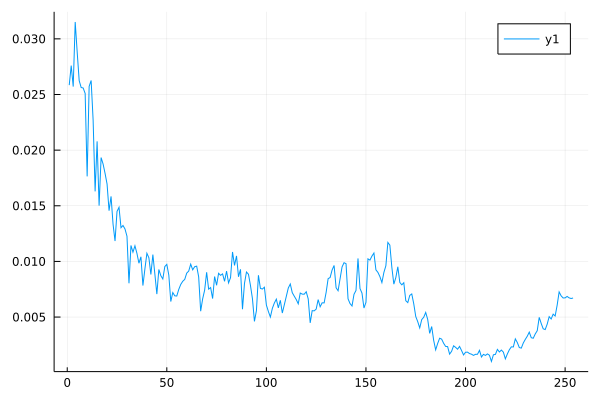

In [94]:
casos_activos = casos_totales# - recuperados_totales - muertos_totales
# infected_today = β * (S * I / N)
# S = N - I
# I[i] - I[i-1] / ((N-I[i]) * I[i] / N) = β 
total_pop = 50300000.0
betas = [ (casos_activos[i] - casos_activos[i-1])/ ((total_pop - casos_activos[i]) * casos_activos[i] / total_pop) for i ∈ 200:length(casos_activos) ]
println(sum(betas)/length(betas))
plot(betas)

In [57]:
mortalidad = (muertos_totales ./ recuperados_totales)[200:end]
sum(mortalidad)/length(mortalidad)

0.032590880549635895